In [ ]:
import numpy as np
import pandas as pd
import json

def trajectory(a_x, a_y,M_leg, M_ball, t, e, ip=0.01):
    # calculating v_leg in x, y, z
    v_l_x = a_x * ip
    v_l_y = a_y * ip
    # calculate v_ball in x, y, z
    v_b_x = v_l_x * (M_leg / (M_leg + M_ball)) * (1 + e)
    v_b_y = v_l_y * (M_leg / (M_leg + M_ball)) * (1 + e)

    # Calculate the trajectory of the ball.
    x_t = v_b_x * t
    y_t = v_b_y * t
    return [x_t, y_t]

def generate_realistic_trajectory_data(num_samples, t_max, num_time_steps):
    """Generate realistic trajectory data."""
    # realistic acceleration ranges
    ax = np.random.uniform(0, 2000, num_samples)
    ay = np.random.uniform(0, 2000, num_samples)

    t = np.linspace(0, t_max, num_time_steps)
    data = []
    penalty_kick_dist = 11
    actual_goal_height = 2.4
    actual_goal_length = 7.3
    actual_goal_width = 3.0
    goal_W_bound = penalty_kick_dist + actual_goal_width
    goal_L_bound = actual_goal_length/2;
    goal_H_bound = actual_goal_height;

    for i in range(num_samples):
        scored = False
        last_x, last_y= 0, 0
        for time in t:
            if not scored:
                x_t, y_t= trajectory(ax[i], ay[i], 9, 0.3, time, 0.7, 0.01)
                in_goal = (y_t >= -goal_L_bound) and (y_t <= goal_L_bound) and (x_t >= penalty_kick_dist) and (x_t <= goal_W_bound)
                if in_goal:
                    scored = True
                    last_x, last_y = x_t, y_t
            else:
                x_t, y_t = last_x, last_y

            data.append({'ax': ax[i], 'ay': ay[i], 'time': time, 'x': x_t, 'y': y_t, 'in_goal': in_goal})

    return data

def convert_bool(data):
    for d in data:
        d['in_goal'] = bool(d['in_goal'])
    return data


num_samples = 100
t_max = 5.0
num_time_steps = 30

data = generate_realistic_trajectory_data(num_samples, t_max, num_time_steps)
data = convert_bool(data)
# saving the data to a JSON file
file_path = 'realistic_trajectory_data.json'
with open(file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print(f"Data has been successfully saved to {file_path}.")


Data has been successfully saved to realistic_trajectory_data.json.


plot sample data produced from the code above

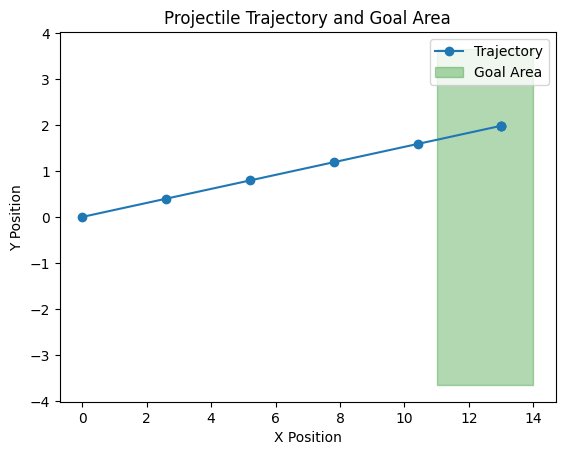

In [ ]:
import matplotlib.pyplot as plt

# sample training data to plot
trajectory_data = [
    {"time": 0.0, "x": 0.0, "y": 0.0},
    {"time": 0.10204081632653061, "x": 2.6025668555657986, "y": 0.3962569241765349},
    {"time": 0.20408163265306123, "x": 5.205133711131597, "y": 0.7925138483530698},
    {"time": 0.30612244897959184, "x": 7.807700566697396, "y": 1.1887707725296046},
    {"time": 0.40816326530612246, "x": 10.410267422263194, "y": 1.5850276967061396},
    {"time": 0.5102040816326531, "x": 13.012834277828993, "y": 1.9812846208826744},
    {"time": 0.6122448979591837, "x": 13.012834277828993, "y": 1.9812846208826744},
    # Add more points as needed
    {"time": 3.8775510204081636, "x": 13.012834277828993, "y": 1.9812846208826744}
]

# extract x and y coordinates
x = [point['x'] for point in trajectory_data]
y = [point['y'] for point in trajectory_data]
fig, ax = plt.subplots()

# plotting the trajectory
ax.plot(x, y, label='Trajectory', marker='o')

# highlighting the goal area
goal_x = [11, 14]
goal_y = [-3.65, 3.65]
ax.fill_between(goal_x, goal_y[0], goal_y[1], color='green', alpha=0.3, label='Goal Area')

# adding labels and legend
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Projectile Trajectory and Goal Area')
ax.legend()
plt.show()
